In [3]:
import numpy as np
import codecs
import array
import sys
import pandas as pd
import os
import matplotlib.pyplot as plt

In [77]:
# t = pd.read_csv('cuttingForce_practice_cd_d26.csv', usecols=[1], skiprows=lambda x: x % 100000 !=0)
# c = pd.read_csv('cuttingForce_practice_cd_d26.csv', usecols=[2], skiprows=lambda x: x % 100000 !=0)
# x = pd.read_csv('cuttingForce_practice_cd_d26.csv', usecols=[3], skiprows=lambda x: x % 100000 !=0)
# y = pd.read_csv('cuttingForce_practice_cd_d26.csv', usecols=[4], skiprows=lambda x: x % 100000 !=0)
# z = pd.read_csv('cuttingForce_practice_cd_d26.csv', usecols=[5], skiprows=lambda x: x % 100000 !=0)

df = pd.read_csv(f'cuttingForce_practice_cd_d26.csv', skiprows=lambda x: x % 100000 !=0)

for i in range(28,32,2):
    df_new = pd.read_csv(f'cuttingForce_practice_cd_d{i}.csv', skiprows=lambda x: x % 100000 !=0)
    df = pd.concat([df, df_new])
print(df)

    Unnamed: 0       time      cd_d          x          y          z
0        99999   0.299997  0.000950   6.573043 -44.119300  28.966320
1       199999   0.599997  0.001900   5.271783 -64.721630  29.087070
2       299999   0.899997  0.002850   5.813939 -77.472340  23.735819
3       399999   1.199997  0.003800   5.597205 -53.352720  28.201720
4       499999   1.499997  0.004750 -18.440504 -45.438150  53.267937
..         ...        ...       ...        ...        ...        ...
46     1699999  45.344586  0.143591  46.794914 -93.378540 -16.871738
47     1799999  45.644586  0.144541  34.360280 -65.615690   4.895048
48     1899999  45.944586  0.145491  60.928474 -99.722780 -23.751953
49     1999999  46.244586  0.146441  46.650425 -77.864204 -16.952160
50     2099999  46.544586  0.147391  29.119015 -69.949630  10.769398

[154 rows x 6 columns]


In [121]:
df = pd.read_csv(r'C:\Users\pmg07\M1\pr1\cuttingForce\cuttingForce_10000_26.csv',skiprows=lambda x: x % 100 !=0)

for i in range(28,506,2):
#     print(i)
    df_new = pd.read_csv(fr'C:\Users\pmg07\M1\pr1\cuttingForce\cuttingForce_10000_{i}.csv',skiprows=lambda x: x % 100 !=0)
#     print(df_new['time'][-3:-1])
    df = pd.concat([df, df_new])
    if(i>500):
        print(df['time'][-3:-1])
        print(i)

print(df)

2    3730.375757
3    3733.375757
Name: time, dtype: float64
502
2    3739.345759
3    3742.345759
Name: time, dtype: float64
504
    Unnamed: 0         time       cd_d          x           y          z
0           99     2.970001   0.009405   3.066931  -59.947700  35.443950
1          199     5.970001   0.018905   9.320264  -63.527960  23.293144
2          299     8.970002   0.028405 -15.765740  -49.960600  51.578130
3          399    11.970002   0.037905  37.261967 -103.916340  11.383839
4          499    14.970003   0.047405  -5.825363  -51.530922  44.617493
..         ...          ...        ...        ...         ...        ...
0           99  3733.345758  11.822262  -1.824355    3.726876  -3.082015
1          199  3736.345758  11.831762   5.079608  -11.913383 -13.261420
2          299  3739.345759  11.841262   3.055474    6.050878  -5.536421
3          399  3742.345759  11.850762   1.790231  -10.154548  -2.277322
4          499  3745.345760  11.860262  -2.113548   -1.926283   6.7

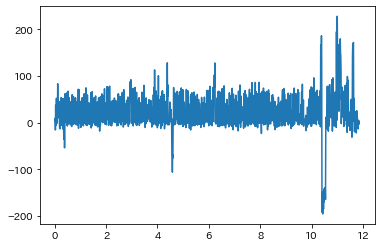

In [123]:
fig = plt.figure()
plt.plot(df['cd_d'],df['x'])
fig.savefig("cutting_force_x_24-504.png")

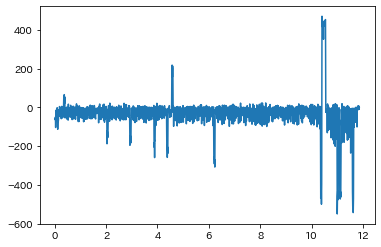

In [124]:
fig = plt.figure()
plt.plot(df['cd_d'],df['y'])
fig.savefig("cutting_force_y_24-504.png")

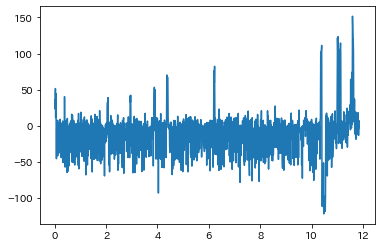

In [125]:
fig = plt.figure()
plt.plot(df['cd_d'],df['z'])
fig.savefig("cutting_force_z_24-504.png")

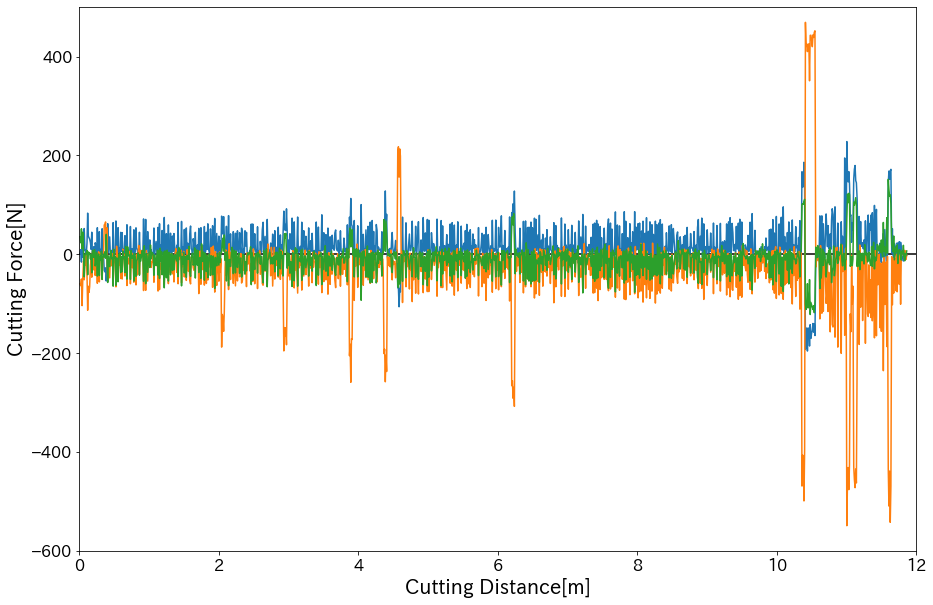

In [164]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
p = plt.plot(df['cd_d'],df['x'])
p = plt.plot(df['cd_d'],df['y'])
p = plt.plot(df['cd_d'],df['z'])
ax.set_xlim(0, 12)
ax.set_ylim(-600,500)
p = ax.set_xlabel("Cutting Distance[m]", fontsize=20)
p = ax.set_ylabel("Cutting Force[N]", fontsize=20)
# p = ax.legend(["x","y","z"], fontsize=20)
p = plt.tick_params(labelsize=16)
p = plt.hlines([0],0,12)

In [2]:
def load_tdms(path, ch_num):
    ch = [[] for _ in range(ch_num)]
    with codecs.open(path, 'rb') as f:
        while True:
            # リードインと呼ばれる部分の読み込み
            tdms = f.read(28) 
            # print(f.tell())
            # print(tdms)
            #if b'TDSm' != tdms[:4]:
            #    continue

            # ファイルを最後まで読み込んだら終了
            if tdms==b'': 
                break

            # データとその区切りを取得
            # 次のセグメントの位置を抽出
            seg_ofs = tdms[12:20]
            by1 = array.array('l')
            by1.frombytes( seg_ofs )
            seg_ofs = np.asarray(by1)[0]
            # データの位置を抽出
            data_ofs= tdms[20:28] 
            by2 = array.array('l')
            by2.frombytes( data_ofs )
            data_ofs = np.asarray(by2)[0]

            # データのある部分まで読み飛ばす
            tdms = f.read(data_ofs)
            #print(tdms[:200], len(tdms))
            #if len(ch[0])==2:
            #    exit()
            #if len(ch[0])==0:
            #    head=tdms
            # データ部分の読み込み
            tdms = f.read(seg_ofs-data_ofs)
            by = array.array('f')
            by.frombytes( tdms )
            data = np.asarray( by )
            # print(data.shape)

            # 各チャンネルを取得
            for i in range(ch_num):
                ch[i].append( data[i::ch_num].reshape(-1,1) )

    for i in range(ch_num):
        ch[i] = np.vstack(ch[i])[:,0]

    return ch

In [12]:
last_t = 3730.375757

from datetime import datetime
start=datetime.now()

nc_d_path = r'C:\Users\pmg07\Desktop\2021_1115_切削実験\dyanano\Dynamometer_503.tdms'
c_d_path = r'C:\Users\pmg07\Desktop\2021_1115_切削実験\dyanano\Dynamometer_504.tdms'


# for_time_d = load_tdms(path, ch_num=3)

# time_length = 16.668

# 時間を表す配列を作る
# time_d = []
# 1サンプリングするのにかかる時間
dt = 1/(10**6)*3


nc_d = load_tdms(nc_d_path, ch_num=3)
c_d = load_tdms(c_d_path, ch_num=3)

N = len(c_d[0])
t_d = np.linspace(last_t, last_t + N*dt, N)  # 周波数軸　linspace(開始,終了,分割数)
cd_d = t_d*(190/60)/1000

nc_x_a = sum(nc_d[0]) / len(nc_d[0])
nc_y_a = sum(nc_d[1]) / len(nc_d[1])
nc_z_a = sum(nc_d[2]) / len(nc_d[2])

x_g = 0.00895
y_g = 0.00515
z_g = 0.00804

c_d[0][:] = (c_d[0][:] - nc_x_a)/ x_g 
c_d[1][:] = (c_d[1][:] - nc_y_a)/ y_g 
c_d[2][:] = (c_d[2][:] - nc_z_a)/ z_g 



for i in range(1 , int(len(c_d[0])/3900)):
    print((i-1)*3900,i*3900)
    print(max(c_d[0][(i-1)*3900:i*3900]))
    print(c_d[0][(i-1)*3900:i*3900].max())


#     dict1 = dict(time=time_d[:3000000], x=c_d[0][:3000000], y=c_d[1][:3000000], z=c_d[2][:3000000])

#     dict2 = dict(time=time_d[3000000:5215536-300000], x=c_d[0][3000000:5215536-300000], y=c_d[1][3000000:5215536-300000], z=c_d[2][3000000:5215536-300000])


#     dict1 = dict(time=t_d[:3000000], cd_d = cd_d[:3000000], x=c_d[0][:3000000], y=c_d[1][:3000000], z=c_d[2][:3000000])
#     dict2 = dict(time=t_d[3000000:], cd_d = cd_d[3000000:], x=c_d[0][3000000:], y=c_d[1][3000000:], z=c_d[2][3000000:])

# dict1 = dict(time=t_d[0:-1:10000], cd_d = cd_d[0:-1:10000], x=c_d[0][0:-1:10000], y=c_d[1][0:-1:10000], z=c_d[2][0:-1:10000])
# df1 = pd.DataFrame(data=dict1)
# df1.to_csv('cuttingForce_10000_504.csv')

# print(datetime.now() - start)

0 3900
9.055844
9.055844
3900 7800
8.079793
8.079793
7800 11700
9.019615
9.019615
11700 15600
6.7785335
6.7785335
15600 19500
11.586118
11.586118
19500 23400
12.778903
12.778903
23400 27300
13.827199
13.827199
27300 31200
15.634599
15.634599
31200 35100
10.501593
10.501593
35100 39000
11.152223
11.152223
39000 42900
11.36917
11.36917
42900 46800
12.670429
12.670429
46800 50700
11.079978
11.079978
50700 54600
15.959806
15.959806
54600 58500
10.86303
10.86303
58500 62400
10.646296
10.646296
62400 66300
8.260511
8.260511
66300 70200
9.706473
9.706473
70200 74100
9.272578
9.272578
74100 78000
13.935673
13.935673
78000 81900
11.007733
11.007733
81900 85800
14.116391
14.116391
85800 89700
11.983784
11.983784
89700 93600
18.309362
18.309362
93600 97500
13.285044
13.285044
97500 101400
10.357103
10.357103
101400 105300
11.947555
11.947555
105300 109200
5.983201
5.983201
109200 113100
13.212585
13.212585
113100 117000
6.6700597
6.6700597
117000 120900
14.333339
14.333339
120900 124800
9.453297


1053000 1056900
17.044333
17.044333
1056900 1060800
11.405399
11.405399
1060800 1064700
14.514058
14.514058
1064700 1068600
12.417466
12.417466
1068600 1072500
9.128089
9.128089
1072500 1076400
9.598
9.598
1076400 1080300
9.670244
9.670244
1080300 1084200
12.417466
12.417466
1084200 1088100
13.718725
13.718725
1088100 1092000
12.489711
12.489711
1092000 1095900
11.043962
11.043962
1095900 1099800
12.308992
12.308992
1099800 1103700
10.357103
10.357103
1103700 1107600
12.561955
12.561955
1107600 1111500
12.706658
12.706658
1111500 1115400
12.959622
12.959622
1115400 1119300
10.24863
10.24863
1119300 1123200
10.031682
10.031682
1123200 1127100
7.7906003
7.7906003
1127100 1131000
16.212984
16.212984
1131000 1134900
13.827199
13.827199
1134900 1138800
13.863428
13.863428
1138800 1142700
11.586118
11.586118
1142700 1146600
8.549704
8.549704
1146600 1150500
7.3569183
7.3569183
1150500 1154400
7.971319
7.971319
1154400 1158300
11.441415
11.441415
1158300 1162200
14.4416
14.4416
1162200 116610

2152800 2156700
13.212585
13.212585
2156700 2160600
12.887377
12.887377
2160600 2164500
14.586303
14.586303
2164500 2168400
9.850964
9.850964
2168400 2172300
13.465762
13.465762
2172300 2176200
11.043962
11.043962
2176200 2180100
15.489896
15.489896
2180100 2184000
19.14071
19.14071
2184000 2187900
9.778718
9.778718
2187900 2191800
9.850964
9.850964
2191800 2195700
12.670429
12.670429
2195700 2199600
11.947555
11.947555
2199600 2203500
17.116577
17.116577
2203500 2207400
18.02017
18.02017
2207400 2211300
16.140526
16.140526
2211300 2215200
7.3569183
7.3569183
2215200 2219100
12.851148
12.851148
2219100 2223000
15.200704
15.200704
2223000 2226900
13.429533
13.429533
2226900 2230800
6.923023
6.923023
2230800 2234700
14.044147
14.044147
2234700 2238600
11.839081
11.839081
2238600 2242500
13.863428
13.863428
2242500 2246400
17.911695
17.911695
2246400 2250300
15.706843
15.706843
2250300 2254200
15.59837
15.59837
2254200 2258100
17.080347
17.080347
2258100 2262000
13.646481
13.646481
226200

7.935303
7.935303
3681600 3685500
5.947185
5.947185
3685500 3689400
17.83945
17.83945
3689400 3693300
14.297111
14.297111
3693300 3697200
12.489711
12.489711
3697200 3701100
11.911326
11.911326
3701100 3705000
7.609882
7.609882
3705000 3708900
10.2124
10.2124
3708900 3712800
6.7785335
6.7785335
3712800 3716700
7.5376368
7.5376368
3716700 3720600
13.935673
13.935673
3720600 3724500
13.899444
13.899444
3724500 3728400
12.742674
12.742674
3728400 3732300
18.707027
18.707027
3732300 3736200
11.116207
11.116207
3736200 3740100
12.959622
12.959622
3740100 3744000
12.561955
12.561955
3744000 3747900
9.200334
9.200334
3747900 3751800
13.682496
13.682496
3751800 3755700
9.634229
9.634229
3755700 3759600
9.706473
9.706473
3759600 3763500
14.839266
14.839266
3763500 3767400
8.224496
8.224496
3767400 3771300
10.284859
10.284859
3771300 3775200
9.778718
9.778718
3775200 3779100
7.8628454
7.8628454
3779100 3783000
13.501778
13.501778
3783000 3786900
8.947371
8.947371
3786900 3790800
12.52594
12.5259